In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fraudTest.csv to fraudTest.csv
Saving fraudTrain.csv to fraudTrain.csv


In [ ]:
import pandas as pd

# Load data
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df  = pd.read_csv('/content/fraudTest.csv')

# Combine datasets
df = pd.concat([train_df, test_df], ignore_index=True)

# Drop unnecessary / PII columns
df.drop(columns=[
    'Unnamed: 0',
    'cc_num',
    'first',
    'last',
    'street',
    'trans_num',
    'unix_time'
], inplace=True)

# Datetime processing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Time-based features
df['trans_hour']  = df['trans_date_trans_time'].dt.hour
df['trans_day']   = df['trans_date_trans_time'].dt.dayofweek
df['trans_month'] = df['trans_date_trans_time'].dt.month

# Save cleaned dataset
df.to_csv('finex_step1_cleaned_data.csv', index=False)

print("Cleaned data saved successfully")
print(df.shape)
print(df['is_fraud'].value_counts(normalize=True))


Cleaned data saved successfully
(1852394, 19)
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('finex_step1_cleaned_data.csv')
print(df.shape)
df.head()


(1852394, 19)


,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,1,1
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,1,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,1,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,1,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,1,1


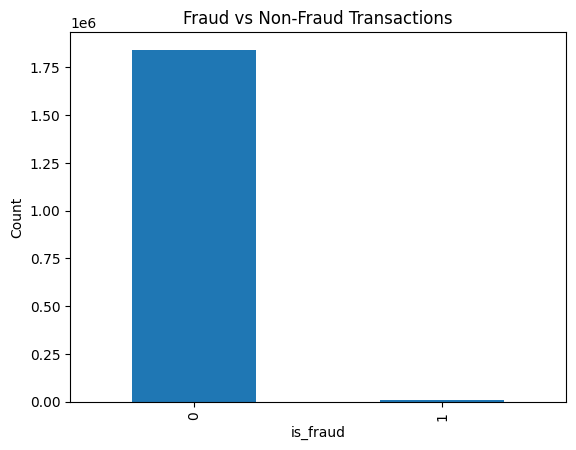

,count
is_fraud,
0,0.99479
1,0.00521


In [ ]:
fraud_counts = df['is_fraud'].value_counts()

plt.figure()
fraud_counts.plot(kind='bar')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

fraud_counts / len(df)


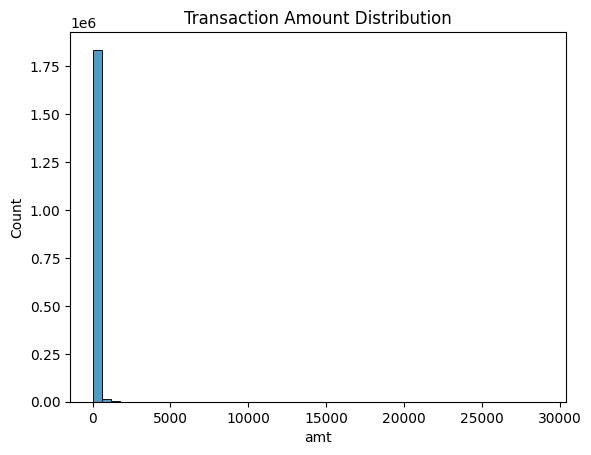

In [ ]:
plt.figure()
sns.histplot(df['amt'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()


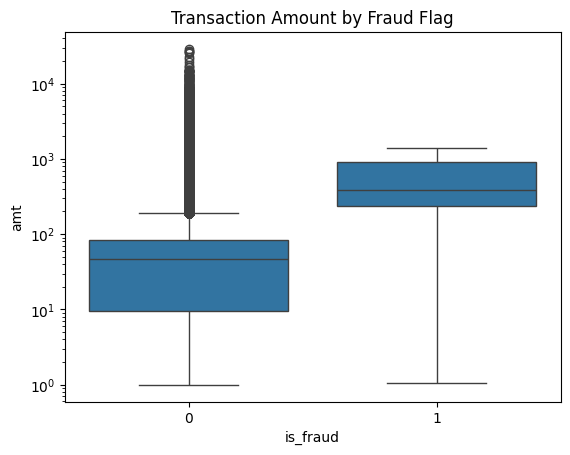

In [ ]:
plt.figure()
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Transaction Amount by Fraud Flag')
plt.show()


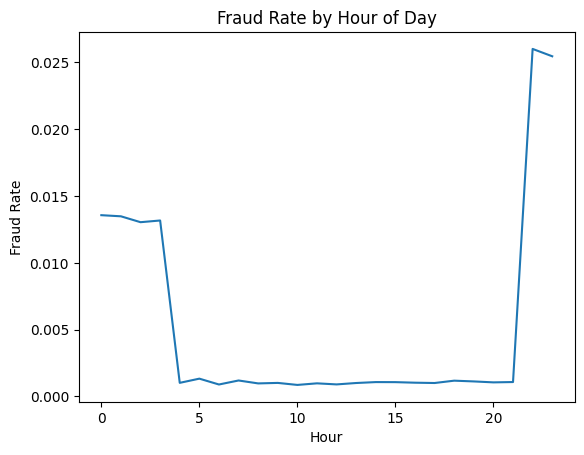

In [ ]:
fraud_by_hour = df.groupby('trans_hour')['is_fraud'].mean()

plt.figure()
fraud_by_hour.plot()
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.show()


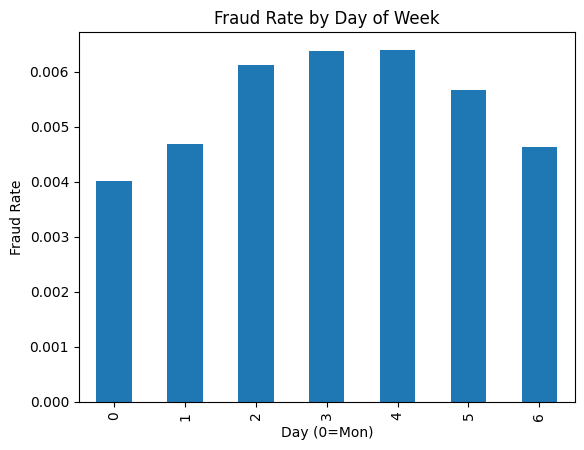

In [ ]:
fraud_by_day = df.groupby('trans_day')['is_fraud'].mean()

plt.figure()
fraud_by_day.plot(kind='bar')
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day (0=Mon)')
plt.ylabel('Fraud Rate')
plt.show()


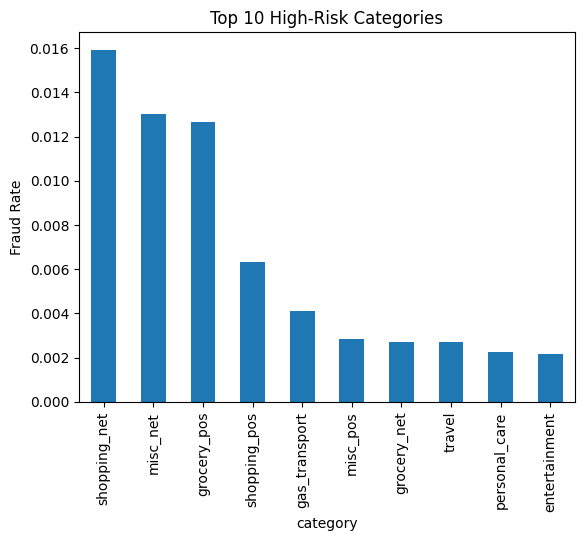

In [ ]:
fraud_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)[:10]

plt.figure()
fraud_by_category.plot(kind='bar')
plt.title('Top 10 High-Risk Categories')
plt.ylabel('Fraud Rate')
plt.show()


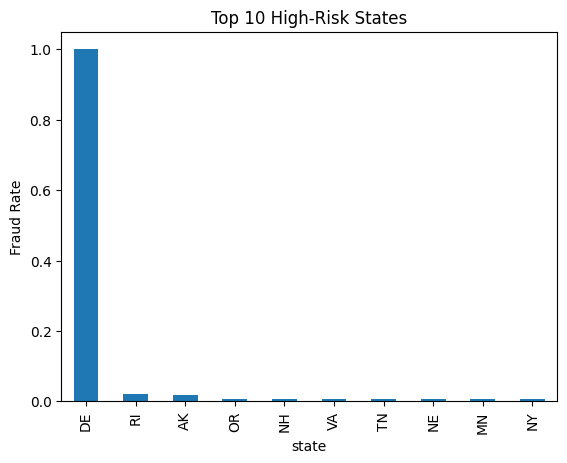

In [ ]:
fraud_by_state = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False)[:10]

plt.figure()
fraud_by_state.plot(kind='bar')
plt.title('Top 10 High-Risk States')
plt.ylabel('Fraud Rate')
plt.show()


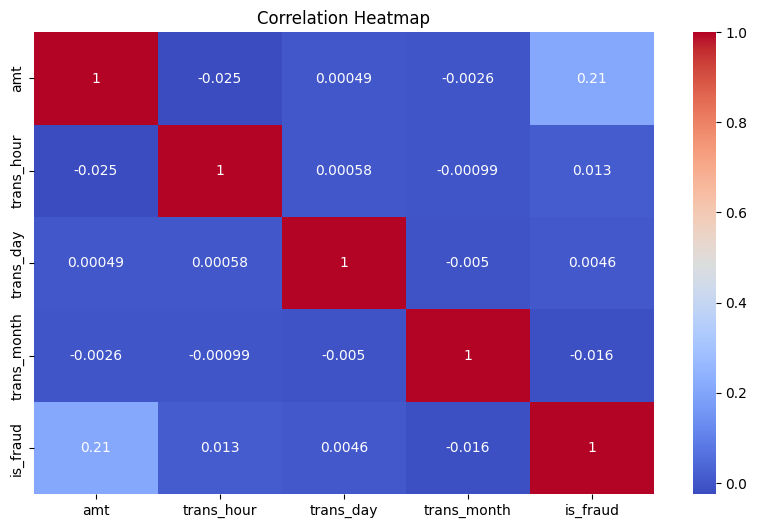

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['amt','trans_hour','trans_day','trans_month','is_fraud']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
os.listdir('/content/drive/MyDrive/Finex_Fraud_Project')


['fraudTest.csv', 'fraudTrain.csv']

In [14]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Finex_Fraud_Project/fraudTrain.csv')
print(df.shape)
df.head()


(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [18]:
from google.colab import files
files.upload()


Output hidden; open in https://colab.research.google.com to view.

In [22]:
df.to_csv(
    '/content/drive/MyDrive/Finex_Fraud_Project/finex_cleaned_data.csv',
    index=False
)


In [23]:
os.listdir('/content/drive/MyDrive/Finex_Fraud_Project')


['fraudTest.csv', 'fraudTrain.csv', 'finex_cleaned_data.csv']

In [24]:
['finex_cleaned_data.csv']


['finex_cleaned_data.csv']

In [25]:
df_model = df.drop(columns=['trans_date_trans_time'])


In [26]:
X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']


In [ ]:
X = pd.get_dummies(X, drop_first=True)
